In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv("../input/df1-preprocessed/df1_preprocessed.csv", low_memory = False)

In [4]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445985 entries, 0 to 445984
Data columns (total 99 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       445985 non-null  float64
 1   funded_amnt                     445985 non-null  float64
 2   funded_amnt_inv                 445985 non-null  float64
 3   term                            445985 non-null  float64
 4   int_rate                        445985 non-null  float64
 5   installment                     445985 non-null  float64
 6   grade                           445985 non-null  object 
 7   emp_title                       445985 non-null  object 
 8   emp_length                      445985 non-null  float64
 9   home_ownership                  445985 non-null  object 
 10  annual_inc                      445985 non-null  float64
 11  verification_status             445985 non-null  object 
 12  pymnt_plan      

In [6]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,good_bad_loan
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,leadman,10.0,MORTGAGE,55000.0,Not Verified,n,debt_consolidation,PA,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,122.67,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,218.0,70.0,33.0,31.0,1
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,Engineer,10.0,MORTGAGE,65000.0,Not Verified,n,small_business,SD,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,926.35,0.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,262.0,70.0,64.0,31.0,1
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,truck driver,10.0,MORTGAGE,63000.0,Not Verified,n,home_improvement,IL,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,15813.30,0.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,254.0,70.0,52.0,31.0,1
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,Contract Specialist,3.0,MORTGAGE,104433.0,Source Verified,n,major_purchase,PA,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,10128.96,0.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,280.0,70.0,63.0,43.0,1
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,Veterinary Tecnician,4.0,RENT,34000.0,Source Verified,n,debt_consolidation,GA,10.20,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,7653.56,0.0,0.0,1.0,Individual,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,

In [7]:
X = df1.drop("good_bad_loan", axis=1)

In [8]:
y = df1["good_bad_loan"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
df_cat = df1.select_dtypes(include="object").copy()
df_num = df1.select_dtypes(include="number").copy()

In [11]:
df_cat.head()

,grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,C,leadman,MORTGAGE,Not Verified,n,debt_consolidation,PA,w,Individual,N,Cash,N
1,C,Engineer,MORTGAGE,Not Verified,n,small_business,SD,w,Individual,N,Cash,N
2,B,truck driver,MORTGAGE,Not Verified,n,home_improvement,IL,w,Joint App,N,Cash,N
3,F,Contract Specialist,MORTGAGE,Source Verified,n,major_purchase,PA,w,Individual,N,Cash,N
4,C,Veterinary Tecnician,RENT,Source Verified,n,debt_consolidation,GA,w,Individual,N,Cash,N


In [12]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445985 entries, 0 to 445984
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   grade                 445985 non-null  object
 1   emp_title             445985 non-null  object
 2   home_ownership        445985 non-null  object
 3   verification_status   445985 non-null  object
 4   pymnt_plan            445985 non-null  object
 5   purpose               445985 non-null  object
 6   addr_state            445985 non-null  object
 7   initial_list_status   445985 non-null  object
 8   application_type      445985 non-null  object
 9   hardship_flag         445985 non-null  object
 10  disbursement_method   445985 non-null  object
 11  debt_settlement_flag  445985 non-null  object
dtypes: object(12)
memory usage: 40.8+ MB


In [13]:
def woe_discrete(df, discrete_var, good_bad_df):
    df = pd.concat([df[discrete_var], good_bad_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'obs', 'good_prop']
    df['prop_obs'] = df['obs']/df['obs'].sum()
    df['good'] = df['good_prop']*df['obs']
    df['bad'] = (1-df['good_prop'])*df['obs']
    df['prop_good'] = df['good'] / df['good'].sum()
    df['prop_bad'] = df['bad'] / df['bad'].sum()
    df['woe'] = np.log(df['prop_good'] / df['prop_bad'])
    df = df.sort_values(['woe'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['good_prop'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['IV'] = (df['prop_good'] - df['prop_bad'])*df['woe']
    df['IV'] = df['IV'].sum()
    return df

In [14]:
def woe_plot(df, x_axis_rotation = 0):
    x = np.array(df.iloc[:, 0].apply(str))
    y = df['woe']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + str(df.columns[0])))
    plt.xticks(rotation = x_axis_rotation)

In [15]:
df_temp = woe_discrete(X, "addr_state", y)
df_temp

,addr_state,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,NE,1454,0.728336,0.003260,1059.0,395.0,0.003042,0.004037,-0.282921,NaN,NaN,0.018998
1,AR,3241,0.733416,0.007267,2377.0,864.0,0.006828,0.008830,-0.257094,0.005080,0.025827,0.018998
2,MS,2743,0.734962,0.006150,2016.0,727.0,0.005791,0.007430,-0.249171,0.001546,0.007922,0.018998
3,OK,4126,0.736064,0.009251,3037.0,1089.0,0.008724,0.011129,-0.243505,0.001102,0.005666,0.018998
4,AL,5459,0.740429,0.012240,4042.0,1417.0,0.011611,0.014481,-0.220918,0.004365,0.022587,0.018998
5,LA,5309,0.742889,0.011904,3944.0,1365.0,0.011329,0.013949,-0.208074,0.002461,0.012843,0.018998
6,NY,34841,0.749749,0.078121,26122.0,8719.0,0.075035,0.089103,-0.171842,0.006859,0.036232,0.018998
7,SD,914,0.750547,0.002049,686.0,228.0,0.001971,0.002330,-0.167583,0.000798,0.004259,0.018998
8,NM,2422,0.761767,0.005431,1845.0,577.0,0.005300,0.005897,-0.106723,0.011220,0.060860,0.018998
9,MD,10697,0.762924,0.023985,8161.0,2536.0,0.023442,0.025916,-0.100337,0.001157,0.006386,0.018998


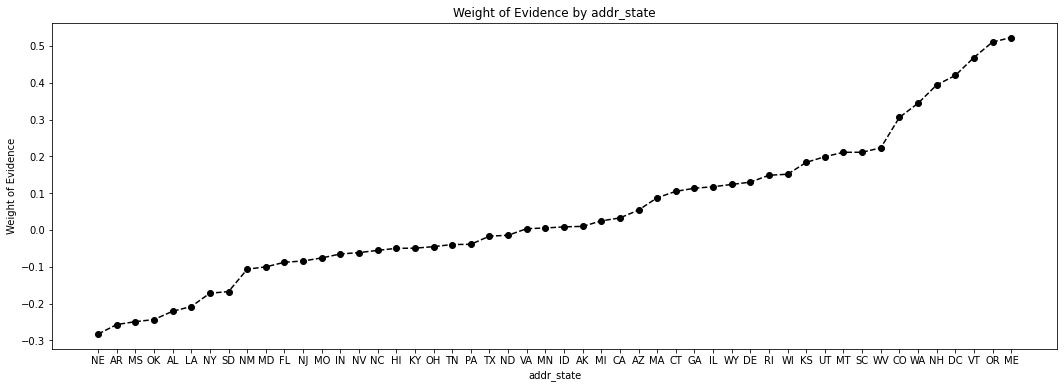

In [16]:
woe_plot(df_temp)

In [17]:
df_addr_state_dummies = pd.get_dummies(df_cat['addr_state'], prefix = 'addr_state', prefix_sep = '_')

In [18]:
type(df_addr_state_dummies)

pandas.core.frame.DataFrame

In [19]:
df_addr_state_dummies.head()

,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_cat['addr_state_NE_AR_MS_OK--_NM_MD'] = sum([df_addr_state_dummies['addr_state_NE'], df_addr_state_dummies['addr_state_AR'],
                                                   df_addr_state_dummies['addr_state_MS'], df_addr_state_dummies['addr_state_OK'],
                                                   df_addr_state_dummies['addr_state_AL'], df_addr_state_dummies['addr_state_LA'],
                                                   df_addr_state_dummies['addr_state_NY'], df_addr_state_dummies['addr_state_SD'],
                                                   df_addr_state_dummies['addr_state_NM'], df_addr_state_dummies['addr_state_MD']])

In [21]:
df_cat['addr_state_FL_NJ_--_OH_TN'] = sum([df_addr_state_dummies['addr_state_FL'], df_addr_state_dummies['addr_state_NJ'],
                                                   df_addr_state_dummies['addr_state_MO'], df_addr_state_dummies['addr_state_IN'],
                                                   df_addr_state_dummies['addr_state_NV'], df_addr_state_dummies['addr_state_NC'],
                                                   df_addr_state_dummies['addr_state_HI'], df_addr_state_dummies['addr_state_KY'],
                                                   df_addr_state_dummies['addr_state_OH'], df_addr_state_dummies['addr_state_TN']])

In [22]:
df_cat['addr_state_PA_TX--_CA_AZ'] = sum([df_addr_state_dummies['addr_state_PA'], df_addr_state_dummies['addr_state_TX'],
                                                   df_addr_state_dummies['addr_state_ND'], df_addr_state_dummies['addr_state_VA'],
                                                   df_addr_state_dummies['addr_state_MN'], df_addr_state_dummies['addr_state_ID'],
                                                   df_addr_state_dummies['addr_state_AK'], df_addr_state_dummies['addr_state_MI'],
                                                   df_addr_state_dummies['addr_state_CA'], df_addr_state_dummies['addr_state_AZ']])

In [23]:
df_cat['addr_state_MA_CT--_KS_UT'] = sum([df_addr_state_dummies['addr_state_MA'], df_addr_state_dummies['addr_state_CT'],
                                                   df_addr_state_dummies['addr_state_GA'], df_addr_state_dummies['addr_state_IL'],
                                                   df_addr_state_dummies['addr_state_WY'], df_addr_state_dummies['addr_state_DE'],
                                                   df_addr_state_dummies['addr_state_RI'], df_addr_state_dummies['addr_state_WI'],
                                                   df_addr_state_dummies['addr_state_KS'], df_addr_state_dummies['addr_state_UT']])

In [24]:
df_cat['addr_state_MT_SC--_OR_ME'] = sum([df_addr_state_dummies['addr_state_MT'], df_addr_state_dummies['addr_state_SC'],
                                                   df_addr_state_dummies['addr_state_WV'], df_addr_state_dummies['addr_state_CO'],
                                                   df_addr_state_dummies['addr_state_WA'], df_addr_state_dummies['addr_state_NH'],
                                                   df_addr_state_dummies['addr_state_DC'], df_addr_state_dummies['addr_state_VT'],
                                                   df_addr_state_dummies['addr_state_OR'], df_addr_state_dummies['addr_state_ME']])

In [25]:
df_cat.head()

,grade,emp_title,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,addr_state_NE_AR_MS_OK--_NM_MD,addr_state_FL_NJ_--_OH_TN,addr_state_PA_TX--_CA_AZ,addr_state_MA_CT--_KS_UT,addr_state_MT_SC--_OR_ME
0,C,leadman,MORTGAGE,Not Verified,n,debt_consolidation,PA,w,Individual,N,Cash,N,0,0,1,0,0
1,C,Engineer,MORTGAGE,Not Verified,n,small_business,SD,w,Individual,N,Cash,N,1,0,0,0,0
2,B,truck driver,MORTGAGE,Not Verified,n,home_improvement,IL,w,Joint App,N,Cash,N,0,0,0,1,0
3,F,Contract Specialist,MORTGAGE,Source Verified,n,major_purchase,PA,w,Individual,N,Cash,N,0,0,1,0,0
4,C,Veterinary Tecnician,RENT,Source Verified,n,debt_consolidation,GA,w,Individual,N,Cash,N,0,0,0,1,0


In [26]:
df_cat.nunique()

grade                                  7
emp_title                         130479
home_ownership                         4
verification_status                    3
pymnt_plan                             2
purpose                               14
addr_state                            50
initial_list_status                    2
application_type                       2
hardship_flag                          2
disbursement_method                    2
debt_settlement_flag                   2
addr_state_NE_AR_MS_OK--_NM_MD         2
addr_state_FL_NJ_--_OH_TN              2
addr_state_PA_TX--_CA_AZ               2
addr_state_MA_CT--_KS_UT               2
addr_state_MT_SC--_OR_ME               2
dtype: int64

In [27]:
df_cat.drop("addr_state", axis=1, inplace=True)

In [28]:
df_grade_dummies = pd.get_dummies(df_cat['grade'], prefix = 'grade', prefix_sep = '_')

In [29]:
df_grade_dummies.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0


In [30]:
df_cat.drop("grade", axis=1, inplace=True)

In [31]:
df_cat = pd.concat([df_cat, df_grade_dummies], axis=1)

In [32]:
df_cat.head()

,emp_title,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,addr_state_NE_AR_MS_OK--_NM_MD,addr_state_FL_NJ_--_OH_TN,addr_state_PA_TX--_CA_AZ,addr_state_MA_CT--_KS_UT,addr_state_MT_SC--_OR_ME,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,leadman,MORTGAGE,Not Verified,n,debt_consolidation,w,Individual,N,Cash,N,0,0,1,0,0,0,0,1,0,0,0,0
1,Engineer,MORTGAGE,Not Verified,n,small_business,w,Individual,N,Cash,N,1,0,0,0,0,0,0,1,0,0,0,0
2,truck driver,MORTGAGE,Not Verified,n,home_improvement,w,Joint App,N,Cash,N,0,0,0,1,0,0,1,0,0,0,0,0
3,Contract Specialist,MORTGAGE,Source Verified,n,major_purchase,w,Individual,N,Cash,N,0,0,1,0,0,0,0,0,0,0,1,0
4,Veterinary Tecnician,RENT,Source Verified,n,debt_consolidation,w,Individual,N,Cash,N,0,0,0,1,0,0,0,1,0,0,0,0


In [33]:
df_temp = woe_discrete(X, "home_ownership", y)
df_temp

,home_ownership,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,ANY,5,0.400000,0.000011,2.0,3.0,0.000006,0.000031,-1.674580,NaN,NaN,0.031821
1,RENT,179655,0.745245,0.402827,133887.0,45768.0,0.384587,0.467722,-0.195704,0.345245,1.478876,0.031821
2,OWN,47775,0.777896,0.107122,37164.0,10611.0,0.106753,0.108438,-0.015666,0.032651,0.180038,0.031821
3,MORTGAGE,218550,0.810245,0.490039,177079.0,41471.0,0.508655,0.423809,0.182486,0.032348,0.198152,0.031821


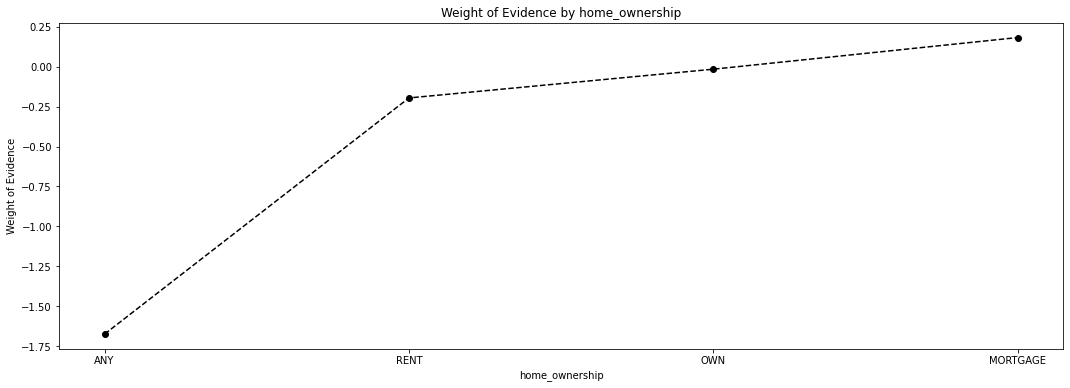

In [34]:
woe_plot(df_temp)

In [35]:
df_homeownership_dummies = pd.get_dummies(df_cat['home_ownership'], prefix = 'home_ownership', prefix_sep = '_')

In [36]:
df_homeownership_dummies.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [37]:
df_cat["home_ownership_ANY_RENT"] = sum([df_homeownership_dummies["home_ownership_ANY"],
                                         df_homeownership_dummies["home_ownership_RENT"]])

In [38]:
df_cat["home_ownership_MORTGAGE"] = df_homeownership_dummies["home_ownership_MORTGAGE"]

In [39]:
df_cat["home_ownership_OWN"] = df_homeownership_dummies["home_ownership_OWN"]

In [40]:
df_cat.drop("home_ownership", axis=1, inplace=True)

In [41]:
df_cat.head()

,emp_title,verification_status,pymnt_plan,purpose,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,addr_state_NE_AR_MS_OK--_NM_MD,addr_state_FL_NJ_--_OH_TN,addr_state_PA_TX--_CA_AZ,addr_state_MA_CT--_KS_UT,addr_state_MT_SC--_OR_ME,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY_RENT,home_ownership_MORTGAGE,home_ownership_OWN
0,leadman,Not Verified,n,debt_consolidation,w,Individual,N,Cash,N,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,Engineer,Not Verified,n,small_business,w,Individual,N,Cash,N,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,truck driver,Not Verified,n,home_improvement,w,Joint App,N,Cash,N,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,Contract Specialist,Source Verified,n,major_purchase,w,Individual,N,Cash,N,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,Veterinary Tecnician,Source Verified,n,debt_consolidation,w,Individual,N,Cash,N,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [42]:
df_verification_dummies = pd.get_dummies(df_cat['verification_status'], prefix = 'verification_status', prefix_sep = '_')

In [43]:
df_cat.drop("verification_status", axis=1, inplace=True)

In [44]:
df_cat = pd.concat([df_cat, df_verification_dummies], axis=1)

In [45]:
df_pymnt_plant_dummies = pd.get_dummies(df_cat['pymnt_plan'], prefix = 'pymnt_plan', prefix_sep = '_')

In [46]:
df_cat.drop("pymnt_plan", axis=1, inplace=True)

In [47]:
df_cat = pd.concat([df_cat, df_pymnt_plant_dummies], axis=1)

In [48]:
df_purpose_dummies = pd.get_dummies(df_cat['purpose'], prefix = 'purpose', prefix_sep = '_')

In [49]:
df_temp = woe_discrete(X, "purpose", y)
df_temp

,purpose,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,small_business,4096,0.666992,0.009184,2732.0,1364.0,0.007848,0.013939,-0.574503,NaN,NaN,inf
1,house,2145,0.736597,0.004810,1580.0,565.0,0.004539,0.005774,-0.240761,0.069605,0.333742,inf
2,renewable_energy,255,0.749020,0.000572,191.0,64.0,0.000549,0.000654,-0.175725,0.012423,0.065036,inf
3,moving,3077,0.749106,0.006899,2305.0,772.0,0.006621,0.007889,-0.175264,0.000087,0.000461,inf
4,medical,4872,0.766626,0.010924,3735.0,1137.0,0.010729,0.011619,-0.079761,0.017519,0.095503,inf
5,debt_consolidation,261697,0.767005,0.586784,200723.0,60974.0,0.576572,0.623118,-0.077637,0.000380,0.002124,inf
6,other,24239,0.768596,0.054349,18630.0,5609.0,0.053514,0.057321,-0.068715,0.001591,0.008922,inf
7,major_purchase,9244,0.784617,0.020727,7253.0,1991.0,0.020834,0.020347,0.023663,0.016021,0.092377,inf
8,home_improvement,29033,0.804154,0.065099,23347.0,5686.0,0.067064,0.058108,0.143346,0.019537,0.119683,inf
9,vacation,2925,0.804444,0.006559,2353.0,572.0,0.006759,0.005846,0.145192,0.000291,0.001846,inf


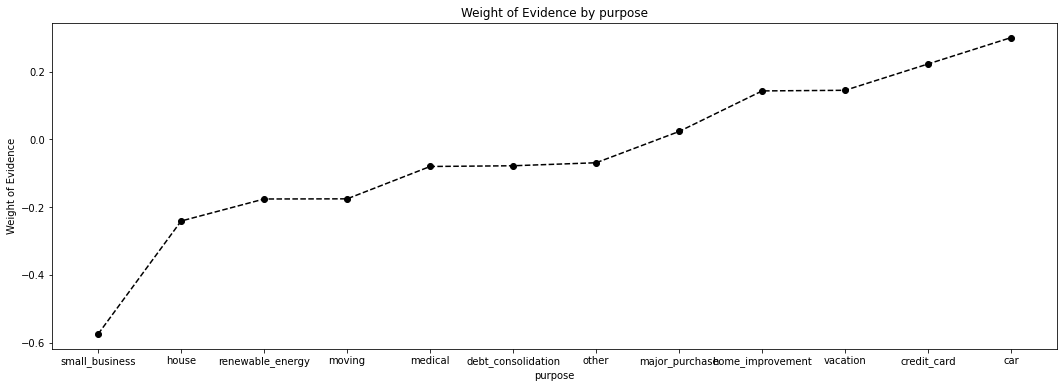

In [50]:
woe_plot(df_temp)

In [51]:
df_cat["purpose_house_hoim_edu_wed"] = sum([df_purpose_dummies["purpose_house"], 
                                            df_purpose_dummies["purpose_home_improvement"],
                                            df_purpose_dummies["purpose_educational"],
                                            df_purpose_dummies["purpose_wedding"]])

In [52]:
df_cat["purpose_sb_re_mo_med_oth_mp_va_ca"] = sum([df_purpose_dummies["purpose_small_business"], 
                                                   df_purpose_dummies["purpose_renewable_energy"],
                                                   df_purpose_dummies["purpose_moving"],
                                                   df_purpose_dummies["purpose_medical"],
                                                   df_purpose_dummies["purpose_other"],
                                                   df_purpose_dummies["purpose_major_purchase"],
                                                   df_purpose_dummies["purpose_vacation"],
                                                   df_purpose_dummies["purpose_car"]])

In [53]:
df_cat["purpose_house_hoim_edu_wed"] = sum([df_purpose_dummies["purpose_debt_consolidation"], 
                                            df_purpose_dummies["purpose_credit_card"]])

In [54]:
df_cat.drop("purpose", axis=1, inplace=True)

In [55]:
df_cat.head()

,emp_title,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,addr_state_NE_AR_MS_OK--_NM_MD,addr_state_FL_NJ_--_OH_TN,addr_state_PA_TX--_CA_AZ,addr_state_MA_CT--_KS_UT,addr_state_MT_SC--_OR_ME,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY_RENT,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_house_hoim_edu_wed,purpose_sb_re_mo_med_oth_mp_va_ca
0,leadman,w,Individual,N,Cash,N,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0
1,Engineer,w,Individual,N,Cash,N,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1
2,truck driver,w,Joint App,N,Cash,N,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,Contract Specialist,w,Individual,N,Cash,N,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4,Veterinary Tecnician,w,Individual,N,Cash,N,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [56]:
df_cat.drop("emp_title", axis=1, inplace=True)

In [57]:
df_cat.nunique()

initial_list_status                    2
application_type                       2
hardship_flag                          2
disbursement_method                    2
debt_settlement_flag                   2
addr_state_NE_AR_MS_OK--_NM_MD         2
addr_state_FL_NJ_--_OH_TN              2
addr_state_PA_TX--_CA_AZ               2
addr_state_MA_CT--_KS_UT               2
addr_state_MT_SC--_OR_ME               2
grade_A                                2
grade_B                                2
grade_C                                2
grade_D                                2
grade_E                                2
grade_F                                2
grade_G                                2
home_ownership_ANY_RENT                2
home_ownership_MORTGAGE                2
home_ownership_OWN                     2
verification_status_Not Verified       2
verification_status_Source Verified    2
verification_status_Verified           2
pymnt_plan_n                           2
pymnt_plan_y    

In [58]:
df_initial_list_dummies = pd.get_dummies(df_cat['initial_list_status'], prefix = 'ini_list_status', prefix_sep = '_')

In [59]:
df_application_type_dummies = pd.get_dummies(df_cat['application_type'], prefix = 'application_type', prefix_sep = '_')

In [60]:
df_hard_flag_dummies = pd.get_dummies(df_cat['hardship_flag'], prefix = 'hardship_flag', prefix_sep = '_')

In [61]:
df_disbu_meth_dummies = pd.get_dummies(df_cat['disbursement_method'], prefix = 'disbursement_method', prefix_sep = '_')

In [62]:
df_debtsetl_flag_dummies = pd.get_dummies(df_cat['debt_settlement_flag'], prefix = 'settle_flag', prefix_sep = '_')

In [63]:
df_cat = pd.concat([df_cat,
                    df_initial_list_dummies,
                    df_application_type_dummies,
                    df_hard_flag_dummies,
                    df_disbu_meth_dummies,
                    df_debtsetl_flag_dummies], axis=1)

In [64]:
df_cat.drop(["initial_list_status", 
             "application_type", 
             "hardship_flag", 
             "disbursement_method", 
             "debt_settlement_flag"], axis=1, inplace=True)

In [65]:
df_cat.head()

,addr_state_NE_AR_MS_OK--_NM_MD,addr_state_FL_NJ_--_OH_TN,addr_state_PA_TX--_CA_AZ,addr_state_MA_CT--_KS_UT,addr_state_MT_SC--_OR_ME,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY_RENT,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_house_hoim_edu_wed,purpose_sb_re_mo_med_oth_mp_va_ca,ini_list_status_f,ini_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,settle_flag_N,settle_flag_Y
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0


In [66]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445985 entries, 0 to 445984
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   addr_state_NE_AR_MS_OK--_NM_MD       445985 non-null  uint8
 1   addr_state_FL_NJ_--_OH_TN            445985 non-null  uint8
 2   addr_state_PA_TX--_CA_AZ             445985 non-null  uint8
 3   addr_state_MA_CT--_KS_UT             445985 non-null  uint8
 4   addr_state_MT_SC--_OR_ME             445985 non-null  uint8
 5   grade_A                              445985 non-null  uint8
 6   grade_B                              445985 non-null  uint8
 7   grade_C                              445985 non-null  uint8
 8   grade_D                              445985 non-null  uint8
 9   grade_E                              445985 non-null  uint8
 10  grade_F                              445985 non-null  uint8
 11  grade_G                              44

In [67]:
df_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,good_bad_loan
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,122.67,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,218.0,70.0,33.0,31.0,1
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,926.35,0.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,262.0,70.0,64.0,31.0,1
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,15813.30,0.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,254.0,70.0,52.0,31.0,1
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,10128.96,0.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,280.0,70.0,63.0,43.0,1
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,7653.56,0.0,0.0,1.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,408.0,70.0,53.0,53.0,1


In [68]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445985 entries, 0 to 445984
Data columns (total 87 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amnt                       445985 non-null  float64
 1   funded_amnt                     445985 non-null  float64
 2   funded_amnt_inv                 445985 non-null  float64
 3   term                            445985 non-null  float64
 4   int_rate                        445985 non-null  float64
 5   installment                     445985 non-null  float64
 6   emp_length                      445985 non-null  float64
 7   annual_inc                      445985 non-null  float64
 8   dti                             445985 non-null  float64
 9   delinq_2yrs                     445985 non-null  float64
 10  inq_last_6mths                  445985 non-null  float64
 11  mths_since_last_delinq          445985 non-null  float64
 12  open_acc        

In [69]:
X = df_num.drop("good_bad_loan", axis=1)
y = df_num["good_bad_loan"]

In [70]:
def woe_continuous(df, discrete_var, good_bad_df):
    df = pd.concat([df[discrete_var], good_bad_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'obs', 'good_prop']
    df['prop_obs'] = df['obs']/df['obs'].sum()
    df['good'] = df['good_prop']*df['obs']
    df['bad'] = (1-df['good_prop'])*df['obs']
    df['prop_good'] = df['good'] / df['good'].sum()
    df['prop_bad'] = df['bad'] / df['bad'].sum()
    df['woe'] = np.log(df['prop_good'] / df['prop_bad'])
   
    df['diff_prop_good'] = df['good_prop'].diff().abs()
    df['diff_woe'] = df['woe'].diff().abs()
    df['IV'] = (df['prop_good'] - df['prop_bad'])*df['woe']
    df['IV'] = df['IV'].sum()
    return df

In [71]:
df_num["loan_amnt_factor"] = pd.cut(df_num["loan_amnt"],5)

In [72]:
df_temp = woe_continuous(df_num, "loan_amnt_factor", y)
df_temp

,loan_amnt_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(961.0, 8800.0]",124003,0.833423,0.278043,103347.0,20656.0,0.296862,0.211092,0.340971,NaN,NaN,0.045682
1,"(8800.0, 16600.0]",163225,0.776486,0.365988,126742.0,36483.0,0.364063,0.372835,-0.023808,0.056937,0.364779,0.045682
2,"(16600.0, 24400.0]",87822,0.743014,0.196917,65253.0,22569.0,0.187438,0.230642,-0.207421,0.033472,0.183612,0.045682
3,"(24400.0, 32200.0]",46044,0.751607,0.103241,34607.0,11437.0,0.099408,0.116879,-0.161913,0.008593,0.045508,0.045682
4,"(32200.0, 40000.0]",24891,0.730505,0.055811,18183.0,6708.0,0.052230,0.068552,-0.271929,0.021102,0.110016,0.045682


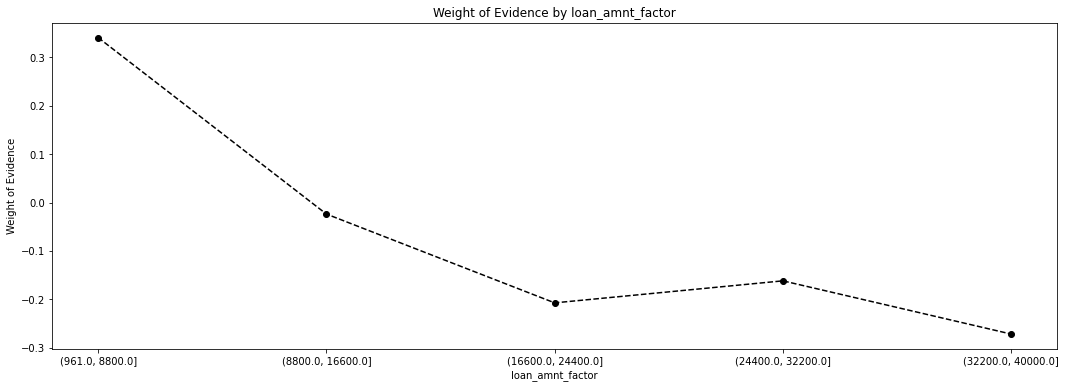

In [73]:
woe_plot(df_temp)

In [74]:
df_num["funded_amnt_inv_factor"] = pd.cut(df_num["funded_amnt_inv"],5)

In [75]:
df_temp = woe_continuous(df_num, "funded_amnt_inv_factor", y)
df_temp

,funded_amnt_inv_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(885.925, 8740.0]",123358,0.833566,0.276597,102827.0,20531.0,0.295368,0.209815,0.341997,NaN,NaN,0.045753
1,"(8740.0, 16555.0]",163790,0.776690,0.367255,127214.0,36576.0,0.365419,0.373785,-0.022637,0.056876,0.364634,0.045753
2,"(16555.0, 24370.0]",87828,0.743055,0.196930,65261.0,22567.0,0.187461,0.230621,-0.207209,0.033635,0.184572,0.045753
3,"(24370.0, 32185.0]",46067,0.751471,0.103293,34618.0,11449.0,0.099439,0.117002,-0.162644,0.008416,0.044565,0.045753
4,"(32185.0, 40000.0]",24942,0.730174,0.055926,18212.0,6730.0,0.052313,0.068777,-0.273610,0.021297,0.110966,0.045753


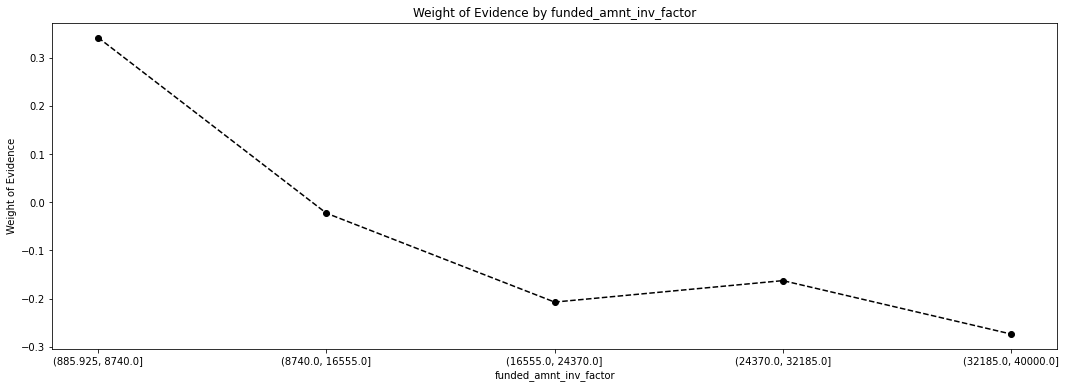

In [76]:
woe_plot(df_temp)

In [77]:
df_num["int_rate_factor"] = pd.cut(df_num["int_rate"],3)

In [78]:
df_temp = woe_continuous(df_num, "int_rate_factor", y)
df_temp

,int_rate_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(5.284, 13.87]",291574,0.857148,0.653775,249922.0,41652.0,0.717894,0.425659,0.522684,NaN,NaN,0.381234
1,"(13.87, 22.43]",138247,0.653591,0.309981,90357.0,47890.0,0.259548,0.489408,-0.634254,0.203557,1.156938,0.381234
2,"(22.43, 30.99]",16164,0.485833,0.036243,7853.0,8311.0,0.022558,0.084934,-1.325800,0.167758,0.691546,0.381234


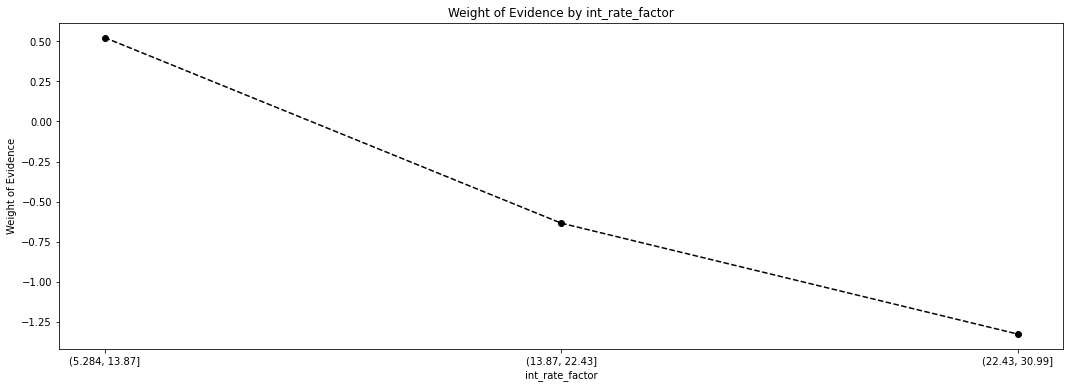

In [79]:
woe_plot(df_temp)

In [80]:
df_num["installment_factor"] = pd.cut(df_num["installment"],5)
df_temp = woe_continuous(df_num, "installment_factor", y)
df_temp

,installment_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(12.304, 355.174]",200990,0.807786,0.450665,162357.0,38633.0,0.466366,0.394806,0.166575,NaN,NaN,0.02149
1,"(355.174, 696.338]",171622,0.756896,0.384816,129900.0,41722.0,0.373134,0.426374,-0.133379,0.050890,0.299954,0.02149
2,"(696.338, 1037.502]",56527,0.761017,0.126746,43018.0,13509.0,0.123568,0.138054,-0.110853,0.004121,0.022526,0.02149
3,"(1037.502, 1378.666]",16506,0.766327,0.037010,12649.0,3857.0,0.036334,0.039416,-0.081427,0.005311,0.029426,0.02149
4,"(1378.666, 1719.83]",340,0.611765,0.000762,208.0,132.0,0.000597,0.001349,-0.814379,0.154563,0.732952,0.02149


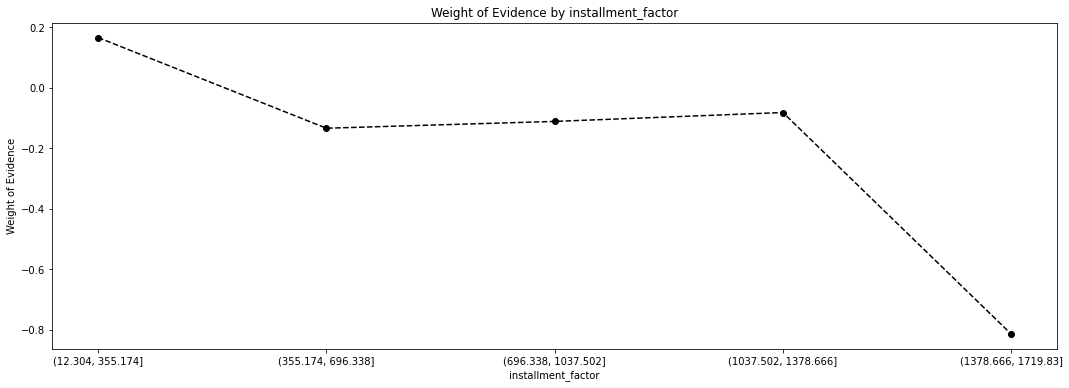

In [81]:
woe_plot(df_temp)

In [82]:
df_num["emp_length_factor"] = pd.cut(df_num["emp_length"],3)
df_temp = woe_continuous(df_num, "emp_length_factor", y)
df_temp

,emp_length_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.01, 3.333]",153142,0.772949,0.343379,118371.0,34771.0,0.340018,0.355339,-0.044075,NaN,NaN,0.001643
1,"(3.333, 6.667]",76079,0.775838,0.170586,59025.0,17054.0,0.169548,0.174282,-0.027539,0.002889,0.016536,0.001643
2,"(6.667, 10.0]",216764,0.787658,0.486034,170736.0,46028.0,0.490435,0.470379,0.041753,0.011820,0.069292,0.001643


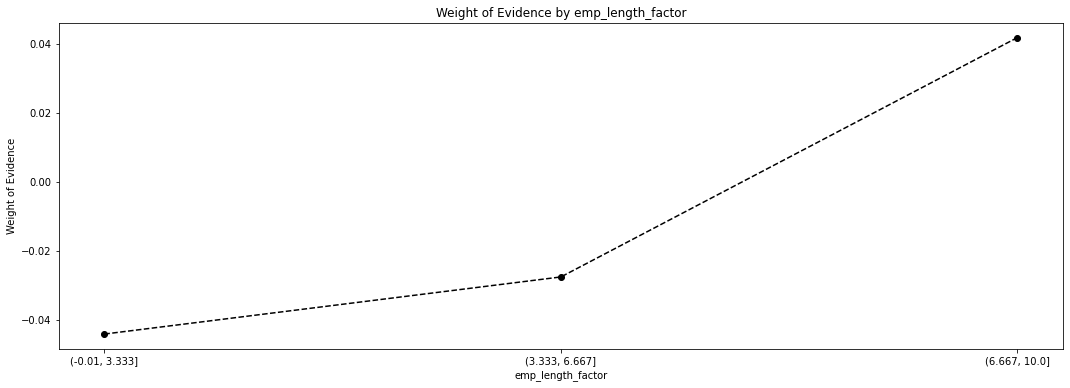

In [83]:
woe_plot(df_temp)

In [84]:
df_num["annual_inc_factor"] = pd.cut(df_num["annual_inc"],10)
df_temp = woe_continuous(df_num, "annual_inc_factor", y)
df_temp

,annual_inc_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-10966.167, 1099949.7]",445879,0.780586,0.999762,348047.0,97832.0,0.999756,0.999785,-0.000030,NaN,NaN,inf
1,"(1099949.7, 2199866.4]",65,0.846154,0.000146,55.0,10.0,0.000158,0.000102,0.435633,0.065568,0.435662,inf
2,"(2199866.4, 3299783.1]",10,0.700000,0.000022,7.0,3.0,0.000020,0.000031,-0.421818,0.146154,0.857450,inf
3,"(3299783.1, 4399699.8]",8,0.750000,0.000018,6.0,2.0,0.000017,0.000020,-0.170503,0.050000,0.251314,inf
4,"(4399699.8, 5499616.5]",8,0.750000,0.000018,6.0,2.0,0.000017,0.000020,-0.170503,0.000000,0.000000,inf
5,"(5499616.5, 6599533.2]",2,1.000000,0.000004,2.0,0.0,0.000006,0.000000,inf,0.250000,inf,inf
6,"(6599533.2, 7699449.9]",2,1.000000,0.000004,2.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
7,"(7699449.9, 8799366.6]",5,0.800000,0.000011,4.0,1.0,0.000011,0.000010,0.117179,0.200000,inf,inf
8,"(8799366.6, 9899283.3]",5,0.400000,0.000011,2.0,3.0,0.000006,0.000031,-1.674580,0.400000,1.791759,inf
9,"(9899283.3, 10999200.0]",1,1.000000,0.000002,1.0,0.0,0.000003,0.000000,inf,0.600000,inf,inf


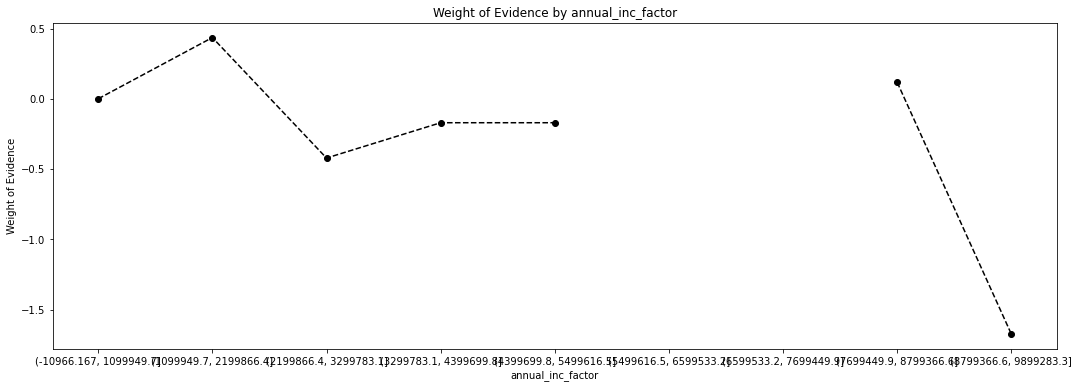

In [85]:
woe_plot(df_temp)

In [86]:
df_num["annual_inc"].describe()

count    4.459850e+05
mean     7.872988e+04
std      7.786982e+04
min      3.300000e+01
25%      4.800000e+04
50%      6.600000e+04
75%      9.400000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [87]:
df_num["annual_inc"].max()

10999200.0

In [88]:
df_num_temp = df_num[df_num['annual_inc'] <= 150000]
df_num_temp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,good_bad_loan,loan_amnt_factor,funded_amnt_inv_factor,int_rate_factor,installment_factor,emp_length_factor,annual_inc_factor
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,122.67,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,218.0,70.0,33.0,31.0,1,"(961.0, 8800.0]","(885.925, 8740.0]","(13.87, 22.43]","(12.304, 355.174]","(6.667, 10.0]","(-10966.167, 1099949.7]"
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,926.35,0.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,262.0,70.0,64.0,31.0,1,"(24400.0, 32200.0]","(24370.0, 32185.0]","(5.284, 13.87]","(696.338, 1037.502]","(6.667, 10.0]","(-10966.167, 1099949.7]"
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,15813.30,0.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,254.0,70.0,52.0,31.0,1,"(16600.0, 24400.0]","(16555.0, 24370.0]","(5.284, 13.87]","(355.174, 696.338]","(6.667, 10.0]","(-10966.167, 1099949.7]"
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,10128.96,0.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,280.0,70.0,63.0,43.0,1,"(8800.0, 16600.0]","(8740.0, 16555.0]","(22.43, 30.99]","(12.304, 355.174]","(-0.01, 3.333]","(-10966.167, 1099949.7]"
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,7653.56,0.0,0.0,1.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,76.0,12900.0,0.0,0.

In [89]:
df_num_temp["annual_inc_factor"] = pd.cut(df_num_temp["annual_inc"],4)
df_temp = woe_continuous(df_num_temp, "annual_inc_factor", y[df_num_temp.index])
df_temp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-116.967, 37524.75]",52576,0.746348,0.125042,39240.0,13336.0,0.120092,0.142301,-0.169686,NaN,NaN,0.015538
1,"(37524.75, 75016.5]",218523,0.766217,0.519715,167436.0,51087.0,0.512428,0.545120,-0.061845,0.019869,0.107842,0.015538
2,"(75016.5, 112508.25]",107496,0.798960,0.255659,85885.0,21611.0,0.262846,0.230599,0.130891,0.032743,0.192736,0.015538
3,"(112508.25, 150000.0]",41872,0.816512,0.099585,34189.0,7683.0,0.104634,0.081981,0.243978,0.017552,0.113087,0.015538


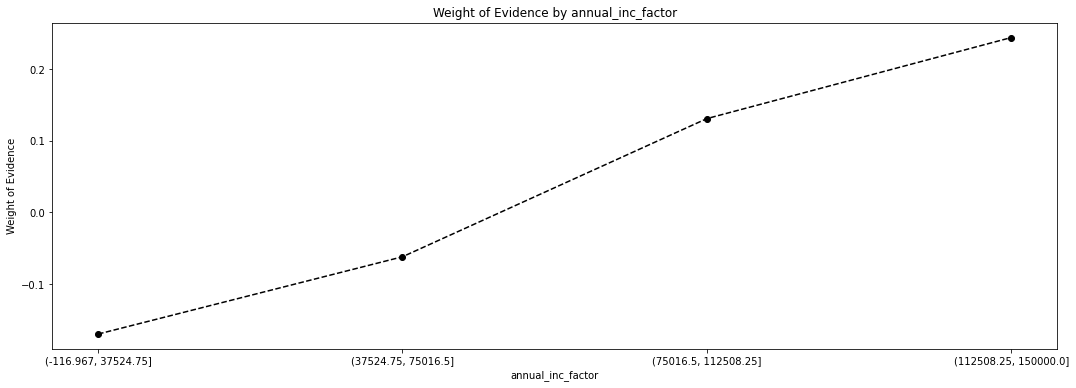

In [90]:
woe_plot(df_temp)

In [91]:
df_num["dti_factor"] = pd.cut(df_num["dti"],3)
df_temp = woe_continuous(df_num, "dti_factor", y)
df_temp

,dti_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.999, 333.0]",445974,0.780588,0.999975,348122.0,97852.0,0.999971,0.99999,-0.000019,NaN,NaN,inf
1,"(333.0, 666.0]",7,0.857143,0.000016,6.0,1.0,0.000017,0.00001,0.522644,0.076555,0.522663,inf
2,"(666.0, 999.0]",4,1.000000,0.000009,4.0,0.0,0.000011,0.00000,inf,0.142857,inf,inf


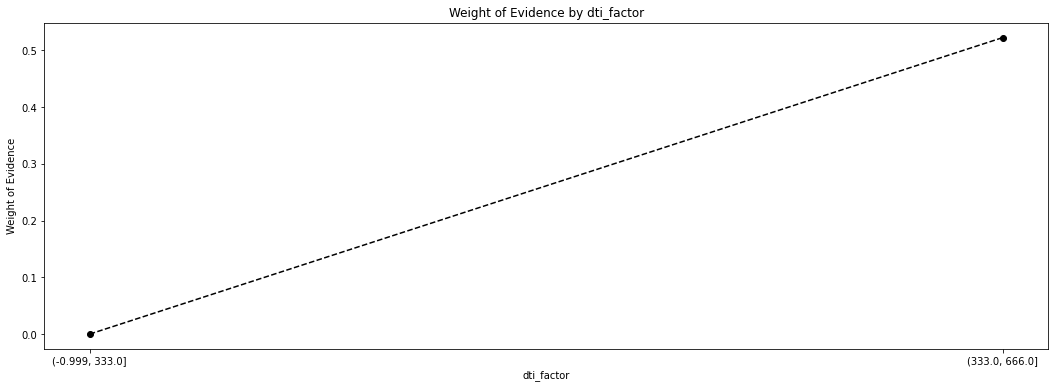

In [92]:
woe_plot(df_temp)

In [93]:
df_num["dti"].mean()

18.998423825913424

In [94]:
df_num_temp = df_num[df_num['dti'] <= 333]
df_num_temp.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,good_bad_loan,loan_amnt_factor,funded_amnt_inv_factor,int_rate_factor,installment_factor,emp_length_factor,annual_inc_factor,dti_factor
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,122.67,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,218.0,70.0,33.0,31.0,1,"(961.0, 8800.0]","(885.925, 8740.0]","(13.87, 22.43]","(12.304, 355.174]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,926.35,0.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,262.0,70.0,64.0,31.0,1,"(24400.0, 32200.0]","(24370.0, 32185.0]","(5.284, 13.87]","(696.338, 1037.502]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,15813.30,0.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,254.0,70.0,52.0,31.0,1,"(16600.0, 24400.0]","(16555.0, 24370.0]","(5.284, 13.87]","(355.174, 696.338]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,10128.96,0.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,280.0,70.0,63.0,43.0,1,"(8800.0, 16600.0]","(8740.0, 16555.0]","(22.43, 30.99]","(12.304, 355.174]","(-0.01, 3.333]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,7653.56,0.0,0.

In [95]:
df_num_temp["dti_factor"] = pd.cut(df_num_temp["dti"],3)
df_temp = woe_continuous(df_num_temp, "dti_factor", y[df_num_temp.index])
df_temp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.313, 104.44]",445888,0.780635,0.999807,348076.0,97812.0,0.999868,0.999591,0.000277,NaN,NaN,0.00034
1,"(104.44, 208.88]",72,0.500000,0.000161,36.0,36.0,0.000103,0.000368,-1.269097,0.280635,1.269374,0.00034
2,"(208.88, 313.32]",14,0.714286,0.000031,10.0,4.0,0.000029,0.000041,-0.352806,0.214286,0.916291,0.00034


In [96]:
df_num_temp2 = df_num[df_num['dti'] <= 70]
df_num_temp2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,good_bad_loan,loan_amnt_factor,funded_amnt_inv_factor,int_rate_factor,installment_factor,emp_length_factor,annual_inc_factor,dti_factor
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,122.67,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,218.0,70.0,33.0,31.0,1,"(961.0, 8800.0]","(885.925, 8740.0]","(13.87, 22.43]","(12.304, 355.174]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,926.35,0.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,262.0,70.0,64.0,31.0,1,"(24400.0, 32200.0]","(24370.0, 32185.0]","(5.284, 13.87]","(696.338, 1037.502]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,15813.30,0.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,254.0,70.0,52.0,31.0,1,"(16600.0, 24400.0]","(16555.0, 24370.0]","(5.284, 13.87]","(355.174, 696.338]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,10128.96,0.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,280.0,70.0,63.0,43.0,1,"(8800.0, 16600.0]","(8740.0, 16555.0]","(22.43, 30.99]","(12.304, 355.174]","(-0.01, 3.333]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,7653.56,0.0,0.

In [97]:
df_num_temp2["dti_factor"] = pd.cut(df_num_temp2["dti"],3)
df_temp = woe_continuous(df_num_temp2, "dti_factor", y[df_num_temp2.index])
df_temp

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(-0.07, 23.333]",310796,0.807478,0.697298,250961.0,59835.0,0.721208,0.612173,0.163913,NaN,NaN,0.054505
1,"(23.333, 46.667]",134070,0.719773,0.300798,96500.0,37570.0,0.277320,0.384379,-0.326456,0.087705,0.490370,0.054505
2,"(46.667, 70.0]",849,0.603062,0.001905,512.0,337.0,0.001471,0.003448,-0.851552,0.116711,0.525095,0.054505


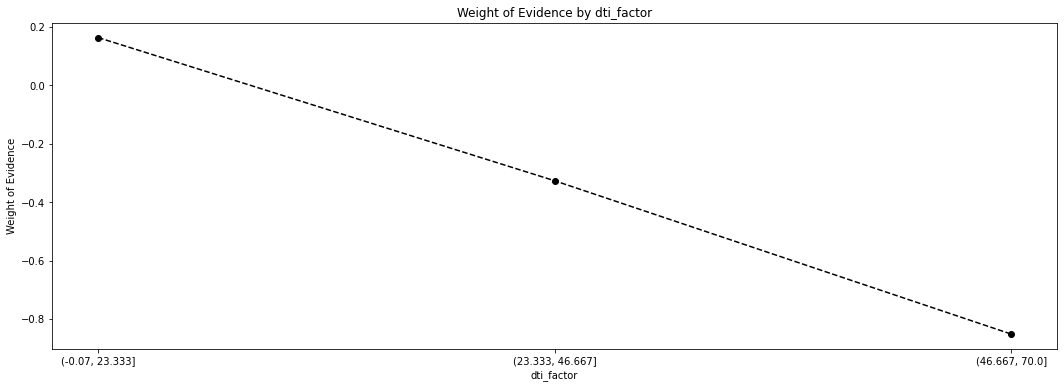

In [98]:
woe_plot(df_temp)

In [99]:
df_num.columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_o

In [100]:
df_num["installment_factor"] = pd.cut(df_num["installment"],5)
df_temp = woe_continuous(df_num, "installment_factor", y)
df_temp

,installment_factor,obs,good_prop,prop_obs,good,bad,prop_good,prop_bad,woe,diff_prop_good,diff_woe,IV
0,"(12.304, 355.174]",200990,0.807786,0.450665,162357.0,38633.0,0.466366,0.394806,0.166575,NaN,NaN,0.02149
1,"(355.174, 696.338]",171622,0.756896,0.384816,129900.0,41722.0,0.373134,0.426374,-0.133379,0.050890,0.299954,0.02149
2,"(696.338, 1037.502]",56527,0.761017,0.126746,43018.0,13509.0,0.123568,0.138054,-0.110853,0.004121,0.022526,0.02149
3,"(1037.502, 1378.666]",16506,0.766327,0.037010,12649.0,3857.0,0.036334,0.039416,-0.081427,0.005311,0.029426,0.02149
4,"(1378.666, 1719.83]",340,0.611765,0.000762,208.0,132.0,0.000597,0.001349,-0.814379,0.154563,0.732952,0.02149


In [101]:
df_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,good_bad_loan,loan_amnt_factor,funded_amnt_inv_factor,int_rate_factor,installment_factor,emp_length_factor,annual_inc_factor,dti_factor
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,10.0,55000.0,5.91,0.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,122.67,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,218.0,70.0,33.0,31.0,1,"(961.0, 8800.0]","(885.925, 8740.0]","(13.87, 22.43]","(12.304, 355.174]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,10.0,65000.0,16.06,1.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,926.35,0.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,262.0,70.0,64.0,31.0,1,"(24400.0, 32200.0]","(24370.0, 32185.0]","(5.284, 13.87]","(696.338, 1037.502]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,10.0,63000.0,10.78,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,15813.30,0.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,10.0,0.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,254.0,70.0,52.0,31.0,1,"(16600.0, 24400.0]","(16555.0, 24370.0]","(5.284, 13.87]","(355.174, 696.338]","(6.667, 10.0]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
3,10400.0,10400.0,10400.0,60.0,22.45,289.91,3.0,104433.0,25.37,1.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,10128.96,0.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,280.0,70.0,63.0,43.0,1,"(8800.0, 16600.0]","(8740.0, 16555.0]","(22.43, 30.99]","(12.304, 355.174]","(-0.01, 3.333]","(-10966.167, 1099949.7]","(-0.999, 333.0]"
4,11950.0,11950.0,11950.0,36.0,13.44,405.18,4.0,34000.0,10.20,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,7653.56,0.0,0.